<a href="https://colab.research.google.com/github/Litaaya/AI-Project/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hiện tại project này vẫn còn đang được hoàn thiện tùy vào trình độ của mình, hiện vẫn đang trong quá trình học thêm về machine learning và deep learning

Import Library and Module

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import plotly.express as px

Load data from Fashion Mnist

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Define list for class_names contain name of all layer in Fashion Mnist which use to train data

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Check for size of the array, đơn vị : pixel

In [ ]:
train_images.shape

(60000, 28, 28)

Check for the length of the array

In [ ]:
len(train_labels)

60000

Check for each variable in the array[training]

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

Deploy image using in training

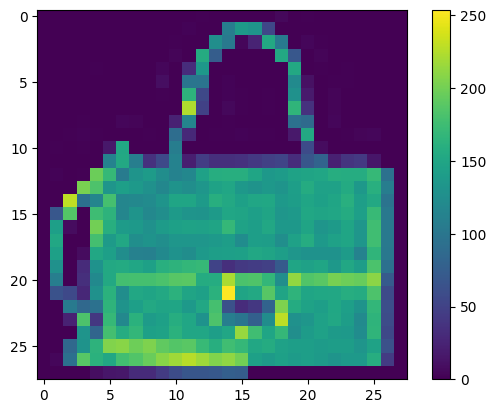

In [ ]:
plt.figure()
plt.imshow(train_images[2005])
plt.colorbar()
plt.grid(False)
plt.show()

Standardized data from [0,255] to [0,1] -> Minimize the influence of outliers

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Deploy image

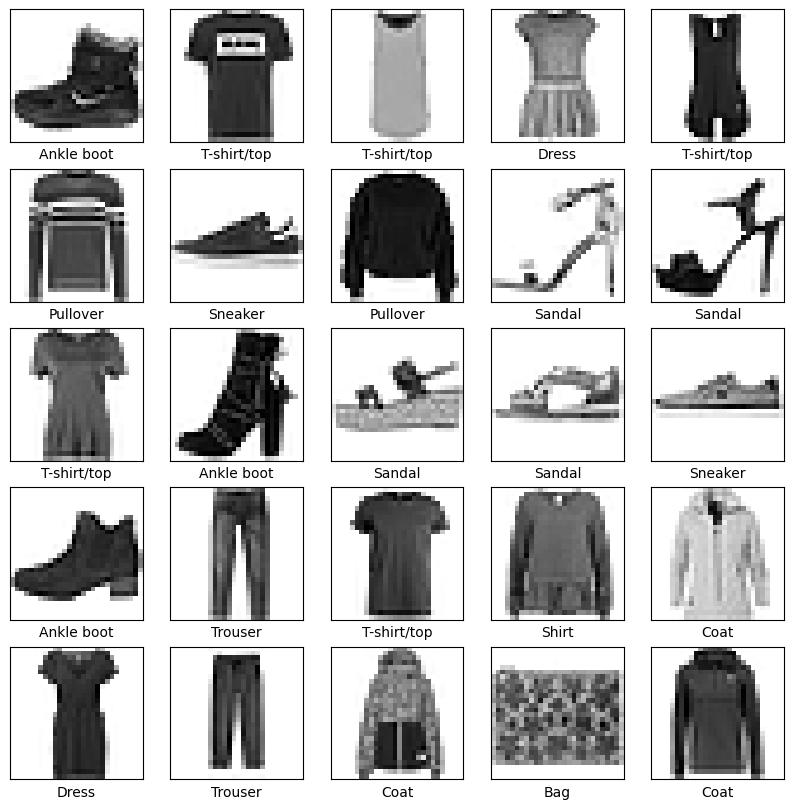

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Neural network model using TensorFlow and Keras

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Model configuration -> These settings will be used during model training to optimize parameters and evaluate model performance.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Start to train here :3

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2299 - accuracy: 0.9136
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2223 - accuracy: 0.9169
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2169 - accuracy: 0.9183
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2091 - accuracy: 0.9220
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2015 - accuracy: 0.9233
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1991 - accuracy: 0.9256
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1933 - accuracy: 0.9275
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1877 - accuracy: 0.9296
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1812 - accuracy: 0.9317
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss

Performance evaluation [loss function and all metric before]

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3477 - accuracy: 0.8795 - 726ms/epoch - 2ms/step

Test accuracy: 0.8794999718666077


Predict the probability -> Softmax will apply a softmax function to the logits and return a probability vector whose elements sum to 1.

In [ ]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

Predict the probabilities of the output classes for the images in the test dataset

In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[1]

array([2.7462082e-05, 3.2301990e-13, 9.9836886e-01, 2.2063101e-14,
       1.5488579e-03, 4.6933268e-10, 5.4765758e-05, 6.0341619e-13,
       3.1231753e-10, 4.2690749e-15], dtype=float32)

In [ ]:
np.argmax(predictions[5555])

0

In [ ]:
test_labels[5555]

0

Column chart to show the predicted probability of each class. The column corresponding to the correctly predicted label will be colored red, and the column corresponding to the actual label will be colored green

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Test

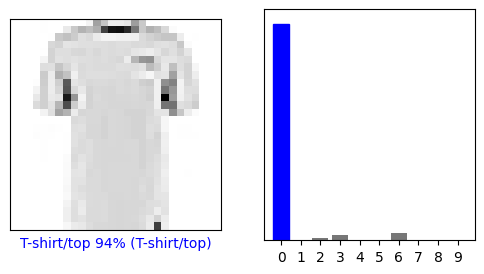

In [ ]:
i = 5555
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

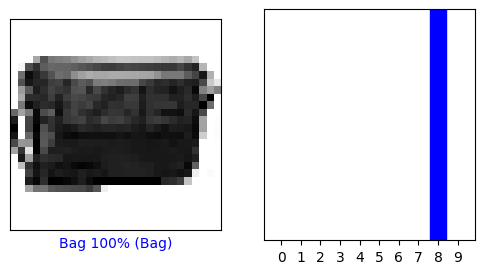

In [ ]:
i = 56
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

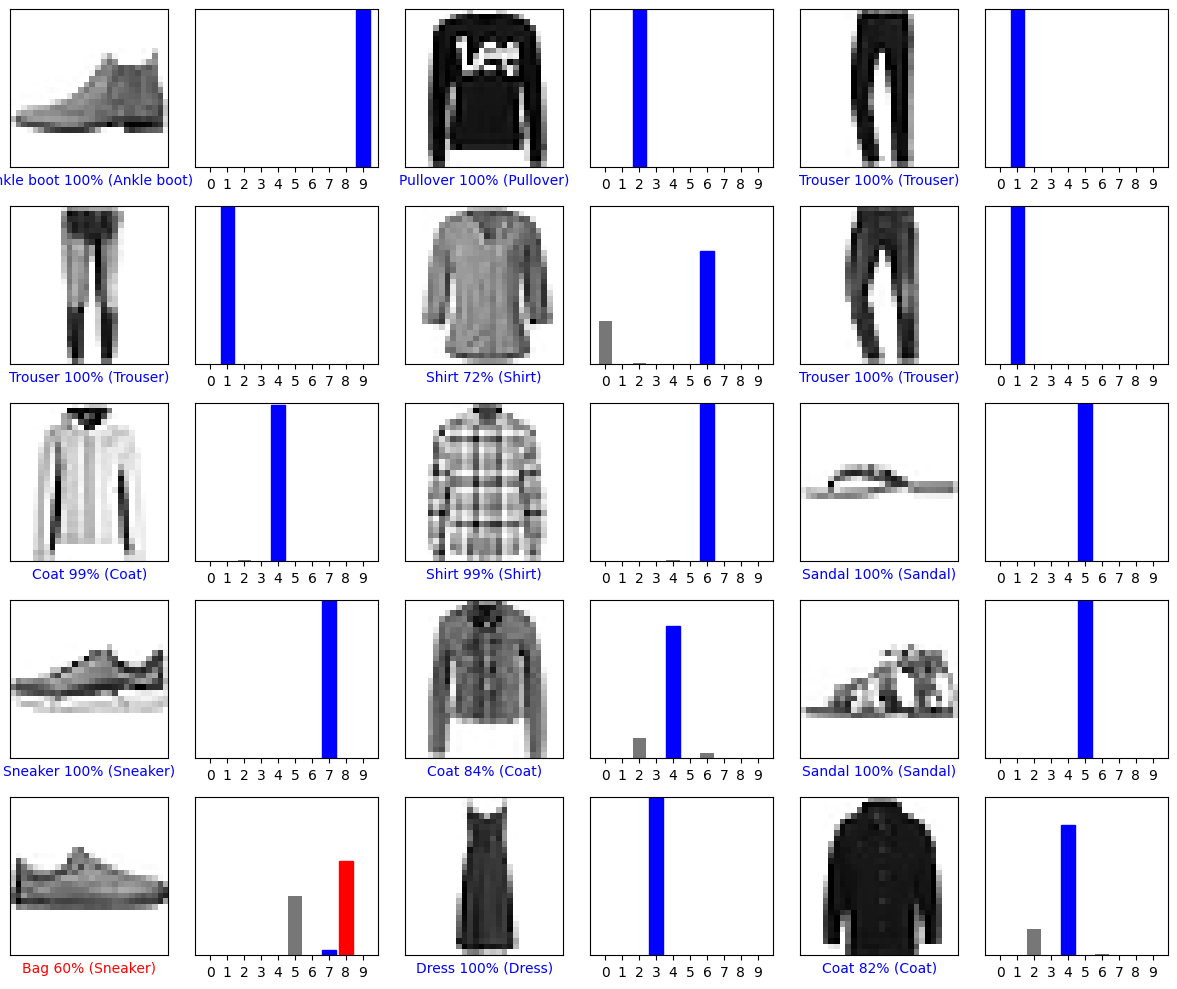

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Final prediction -> results here <3

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 40ms/step
[[2.24664447e-07 1.37421853e-13 3.81179222e-09 2.52512058e-14
  9.03303210e-10 1.10601105e-10 1.86504074e-08 2.83122914e-10
  9.99999762e-01 1.42253321e-12]]


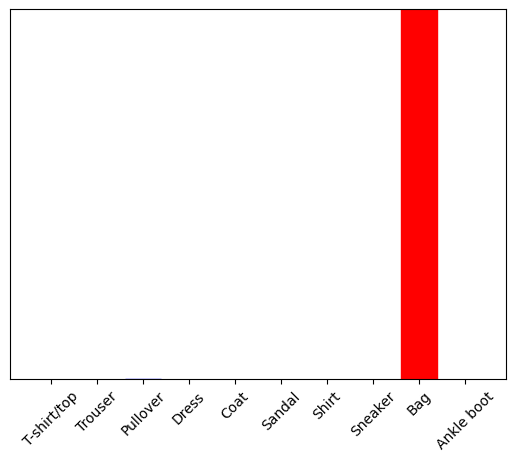

In [ ]:
img = test_images[56]

print(img.shape)

img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

0

Matrix

In [ ]:
y_probs = model.predict(test_images)

y_preds = y_probs.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


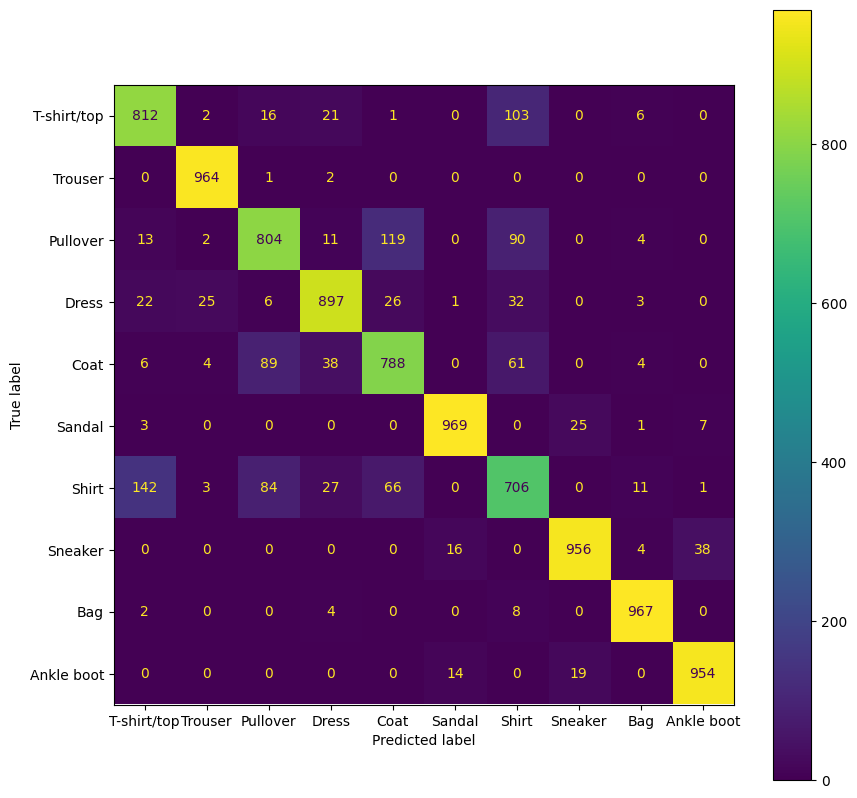

In [ ]:
cm=confusion_matrix(y_preds,test_labels)

disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);

In [ ]:
target_names = class_names

In [ ]:
print(classification_report(test_labels, y_preds, target_names = target_names))

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.81      0.83      1000
     Trouser       1.00      0.96      0.98      1000
    Pullover       0.77      0.80      0.79      1000
       Dress       0.89      0.90      0.89      1000
        Coat       0.80      0.79      0.79      1000
      Sandal       0.96      0.97      0.97      1000
       Shirt       0.68      0.71      0.69      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

